# Strategic Thinking CA1

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

import pandas_profiling
from pandas_profiling import ProfileReport

import glob
import os

## Data Understanding


In [2]:
df = pd.read_csv('3Wdataset.csv')

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50822124 entries, 0 to 50822123
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   label       int64  
 1   well        object 
 2   id          int64  
 3   P-PDG       float64
 4   P-TPT       float64
 5   T-TPT       float64
 6   P-MON-CKP   float64
 7   T-JUS-CKP   float64
 8   P-JUS-CKGL  float64
 9   T-JUS-CKGL  float64
 10  QGL         float64
 11  class       float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.5+ GB


(50822124, 12)

In [4]:
df.describe()

,label,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
count,5.082212e+07,5.082212e+07,5.081625e+07,5.081594e+07,4.501115e+07,4.970050e+07,4.921043e+07,1.000749e+07,0.0,1.069126e+07,5.081736e+07
mean,3.387997e+00,5.536792e+12,-4.923179e+39,1.467257e+07,1.044371e+02,3.587708e+06,7.559043e+01,4.052477e+06,NaN,1.694197e-01,2.909494e+01
std,2.526282e+00,9.000317e+12,7.606369e+40,4.379132e+07,2.727372e+01,3.354934e+06,2.147815e+01,5.221975e+06,NaN,4.591983e-01,4.440501e+01
min,0.000000e+00,1.000000e+00,-1.180116e+42,0.000000e+00,0.000000e+00,-8.317492e+03,-2.020000e+00,-4.976717e+05,NaN,0.000000e+00,0.000000e+00
25%,1.000000e+00,4.300000e+01,1.161616e+07,1.099830e+07,9.697665e+01,1.186575e+06,6.702149e+01,2.312238e+06,NaN,0.000000e+00,1.000000e+00
50%,4.000000e+00,1.290000e+02,2.189268e+07,1.452439e+07,1.167546e+02,1.963778e+06,7.735565e+01,2.332198e+06,NaN,0.000000e+00,5.000000e+00
75%,5.000000e+00,2.014032e+13,2.605564e+07,1.755830e+07,1.217072e+02,5.116738e+06,8.478074e+01,3.430441e+06,NaN,0.000000e+00,1.010000e+02
max,8.000000e+00,2.018062e+13,4.485805e+07,2.941990e+09,1.277401e+02,1.303717e+07,1.730961e+02,2.106982e+07,NaN,4.146513e+00,1.080000e+02


Generating EDA report and saving to HTML file

In [5]:
#from dataprep.eda import create_report
#report = create_report(df)
#report.save('3W Dataset EDA Report')

In [6]:
df = df.drop(columns=['T-JUS-CKGL']) #100% NaN

In [7]:
df.head()

,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,WELL-00002,20170625220127,0.0,8698015.0,117.6015,2142158.0,75.63453,2310426.0,0.0,0.0
1,0,WELL-00002,20170625220127,0.0,8698015.0,117.6014,2172395.0,75.65491,2310427.0,0.0,0.0
2,0,WELL-00002,20170625220127,0.0,8698015.0,117.6013,2202631.0,75.67529,2310427.0,0.0,0.0
3,0,WELL-00002,20170625220127,0.0,8698015.0,117.6012,2180472.0,75.69567,2310427.0,0.0,0.0
4,0,WELL-00002,20170625220127,0.0,8698015.0,117.6011,2158313.0,75.71606,2310428.0,0.0,0.0


Remove duplicate rows

In [8]:
df.drop_duplicates(inplace = True, ignore_index = True)

In [9]:
df.shape

(47735273, 11)

In [10]:
df_nonulls = df.dropna()

In [11]:
df_nonulls.shape

(9955876, 11)

In [12]:
#report = create_report(df_nonulls)
#report.save('3W Dataset EDA Report - No Null Values')

In [13]:
df_nonulls.describe()

,label,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
count,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06
mean,1.075626e+00,2.016677e+13,-2.505632e+40,1.643428e+07,1.116069e+02,4.426371e+06,7.765858e+01,4.071639e+06,9.927879e-02,7.705904e+00
std,1.934351e+00,1.096420e+10,1.701222e+41,9.796013e+07,1.807550e+01,3.668974e+06,3.272353e+01,5.223427e+06,3.677854e-01,2.614636e+01
min,0.000000e+00,2.013110e+13,-1.180116e+42,0.000000e+00,0.000000e+00,7.678105e+05,-2.020000e+00,-4.976717e+05,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.017022e+13,0.000000e+00,8.478569e+06,1.165482e+02,1.641370e+06,6.871674e+01,2.313912e+06,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.017053e+13,0.000000e+00,1.385396e+07,1.171824e+02,2.467567e+06,7.373584e+01,2.332347e+06,0.000000e+00,0.000000e+00
75%,1.000000e+00,2.017082e+13,2.353645e+07,1.653820e+07,1.178883e+02,6.151561e+06,7.852245e+01,3.440053e+06,0.000000e+00,0.000000e+00
max,7.000000e+00,2.018062e+13,4.485805e+07,2.941990e+09,1.196061e+02,1.235933e+07,1.730961e+02,2.106982e+07,4.146513e+00,1.070000e+02


Count rows by class

In [14]:
df_nonulls = df_nonulls.reset_index()

In [15]:
df_nonulls.groupby(by='class').agg('count')

,index,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL
class,,,,,,,,,,,
0.0,7473635,7473635,7473635,7473635,7473635,7473635,7473635,7473635,7473635,7473635,7473635
1.0,5870,5870,5870,5870,5870,5870,5870,5870,5870,5870,5870
2.0,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309
3.0,568352,568352,568352,568352,568352,568352,568352,568352,568352,568352,568352
4.0,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415
5.0,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147
6.0,12427,12427,12427,12427,12427,12427,12427,12427,12427,12427,12427
7.0,821,821,821,821,821,821,821,821,821,821,821
101.0,77814,77814,77814,77814,77814,77814,77814,77814,77814,77814,77814


Select rows where class is either 0.0 (Normal) or 4.0 (Flow Instability)

In [16]:
df = df_nonulls.loc[df_nonulls['class'].isin([0.0, 4.0])]

In [17]:
df.head()

,index,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,0,WELL-00002,20170625220127,0.0,8698015.0,117.6015,2142158.0,75.63453,2310426.0,0.0,0.0
1,1,0,WELL-00002,20170625220127,0.0,8698015.0,117.6014,2172395.0,75.65491,2310427.0,0.0,0.0
2,2,0,WELL-00002,20170625220127,0.0,8698015.0,117.6013,2202631.0,75.67529,2310427.0,0.0,0.0
3,3,0,WELL-00002,20170625220127,0.0,8698015.0,117.6012,2180472.0,75.69567,2310427.0,0.0,0.0
4,4,0,WELL-00002,20170625220127,0.0,8698015.0,117.6011,2158313.0,75.71606,2310428.0,0.0,0.0


Replace class value = 4.0 with 1.0

In [18]:
df.loc[df['class'] == 4.0, 'class'] = 1.0

In [19]:
df.groupby(by='class').agg('count')

,index,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL
class,,,,,,,,,,,
0.0,7473635,7473635,7473635,7473635,7473635,7473635,7473635,7473635,7473635,7473635,7473635
1.0,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415


In [20]:
df.head()

,index,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,0,WELL-00002,20170625220127,0.0,8698015.0,117.6015,2142158.0,75.63453,2310426.0,0.0,0.0
1,1,0,WELL-00002,20170625220127,0.0,8698015.0,117.6014,2172395.0,75.65491,2310427.0,0.0,0.0
2,2,0,WELL-00002,20170625220127,0.0,8698015.0,117.6013,2202631.0,75.67529,2310427.0,0.0,0.0
3,3,0,WELL-00002,20170625220127,0.0,8698015.0,117.6012,2180472.0,75.69567,2310427.0,0.0,0.0
4,4,0,WELL-00002,20170625220127,0.0,8698015.0,117.6011,2158313.0,75.71606,2310428.0,0.0,0.0


In [21]:
df = df.drop(columns=['well'])

In [22]:
df.head()

,index,label,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,0,20170625220127,0.0,8698015.0,117.6015,2142158.0,75.63453,2310426.0,0.0,0.0
1,1,0,20170625220127,0.0,8698015.0,117.6014,2172395.0,75.65491,2310427.0,0.0,0.0
2,2,0,20170625220127,0.0,8698015.0,117.6013,2202631.0,75.67529,2310427.0,0.0,0.0
3,3,0,20170625220127,0.0,8698015.0,117.6012,2180472.0,75.69567,2310427.0,0.0,0.0
4,4,0,20170625220127,0.0,8698015.0,117.6011,2158313.0,75.71606,2310428.0,0.0,0.0


In [23]:
df = df.drop(columns=['index'])

In [24]:
df.shape

(8692050, 10)

In [25]:
df.head()

,label,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,20170625220127,0.0,8698015.0,117.6015,2142158.0,75.63453,2310426.0,0.0,0.0
1,0,20170625220127,0.0,8698015.0,117.6014,2172395.0,75.65491,2310427.0,0.0,0.0
2,0,20170625220127,0.0,8698015.0,117.6013,2202631.0,75.67529,2310427.0,0.0,0.0
3,0,20170625220127,0.0,8698015.0,117.6012,2180472.0,75.69567,2310427.0,0.0,0.0
4,0,20170625220127,0.0,8698015.0,117.6011,2158313.0,75.71606,2310428.0,0.0,0.0


## Splitting the data

In [26]:
# Store first 9 columns in an array X 
X = df.iloc[:,:9]

# Store the target variable as lable into an array y
y = df.iloc[:,9]

# Display number of rows and columns
X.shape, y.shape

((8692050, 9), (8692050,))

In [27]:
print(X,y)

         label              id       P-PDG       P-TPT      T-TPT  P-MON-CKP  \
0            0  20170625220127         0.0   8698015.0  117.60150  2142158.0   
1            0  20170625220127         0.0   8698015.0  117.60140  2172395.0   
2            0  20170625220127         0.0   8698015.0  117.60130  2202631.0   
3            0  20170625220127         0.0   8698015.0  117.60120  2180472.0   
4            0  20170625220127         0.0   8698015.0  117.60110  2158313.0   
...        ...             ...         ...         ...        ...        ...   
9953075      5  20180426145108  24385650.0  11138830.0   71.30707   832998.4   
9953076      5  20180426145108  24387590.0  11139520.0   71.27717   832544.6   
9953077      5  20180426145108  24389540.0  11140210.0   71.24727   832090.9   
9953078      5  20180426145108  24391490.0  11140900.0   71.21737   831637.2   
9953079      5  20180426145108  24393440.0  11141590.0   71.18747   831183.4   

         T-JUS-CKP  P-JUS-CKGL       QG

In [28]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

## Balancing

In [65]:
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#X_resampled, y_resampled = SMOTE(sampling_strategy= 0.7, n_jobs= -1, random_state=42).fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))
X_resampled.shape, y_resampled.shape 
#[(0, 4674), (1, 4674), (2, 4674)]

#X_resampled, y_resampled = ADASYN().fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))
#[(0, 4673), (1, 4662), (2, 4674)]
#clf_adasyn = LinearSVC().fit(X_resampled, y_resampled)

[(0.0, 1218415), (1.0, 1218415)]


((2436830, 9), (2436830,))

In [66]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Split the dataset (X, y) into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 82)

# Display rows and columns
X_train.shape, X_test.shape

((1949464, 9), (487366, 9))

In [67]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Create an initialise an object sc by calling a method StandardScaler()
sc = MaxAbsScaler()

# Train the model by calling a method fit_transform
X_train = sc.fit_transform(X_train)

# Store the transformed data into X_test
X_test = sc.transform(X_test)

In [68]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Call fit() method for training the dataset
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [69]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

[1. 1. 0. ... 0. 0. 1.]


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [71]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10,:]

array([[1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.]])

In [72]:
# Model Accuracy, how often is the classifier correct?
# In case of any errors, install conda install python-graphviz     on the command line
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    243913
         1.0       1.00      1.00      1.00    243453

    accuracy                           1.00    487366
   macro avg       1.00      1.00      1.00    487366
weighted avg       1.00      1.00      1.00    487366



In [73]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


[[243913      0]
 [     0 243453]] (2, 2)


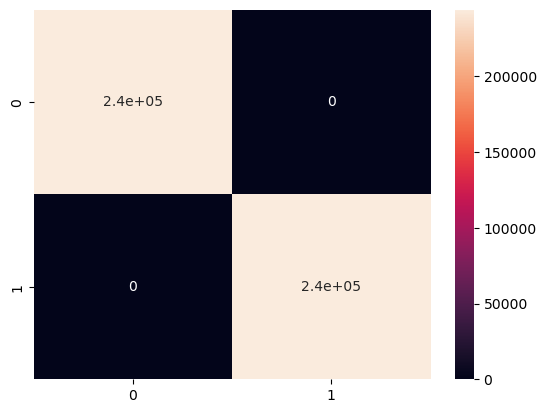

In [74]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print(cm, cm.shape)

In [76]:
from sklearn.model_selection import cross_val_score

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Calculate the score using cross validation method
cross_val_score(nvclassifier, X_resampled, y_resampled, scoring = 'accuracy', cv = 20).mean()

0.5009532876712515

In [77]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(X_train, y_train)

In [78]:
y_pred = clf.predict(X_test)

In [79]:
# Model Accuracy, how often is the classifier correct?
# In case of any errors, install conda install python-graphviz     on the command line
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    243913
         1.0       0.99      1.00      1.00    243453

    accuracy                           1.00    487366
   macro avg       1.00      1.00      1.00    487366
weighted avg       1.00      1.00      1.00    487366



[[242614   1299]
 [    22 243431]] (2, 2)


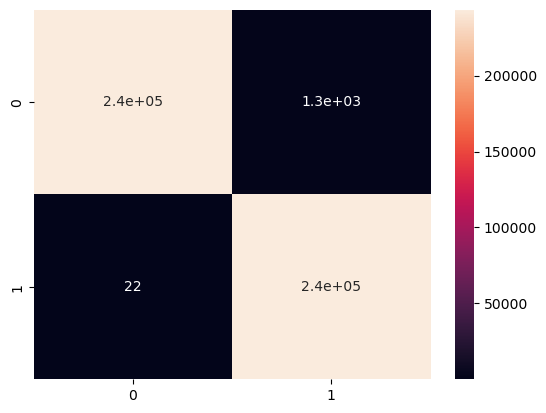

In [80]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print(cm, cm.shape)